<a href="https://colab.research.google.com/github/WambuiN/DSCORE_IP_WEEK6/blob/main/Wambui_Njoroge_DSCore6_IP6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning with Exploratory Data Analysis 

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#Loading the Results Dataset
results = pd.read_csv('results.csv')
results.shape

(40839, 9)

Checking the Records in the Results Dataset


In [8]:
# Previewing the top of our dataset
results.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [9]:
# Previewing the bottom of our dataset
results.tail(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [11]:
# Checking whether each column has an appropriate datatype
results.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

The Results Dataset has 40839 rows and 9 columns. The dataset is uniform from the top to the bottom. The data types for each column are apporpriate

Checking the Records in the Ranking Dataset

In [12]:
#Loading the Ranking Dataset
ranking = pd.read_csv('fifa_ranking.csv')
ranking.head(3)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08


In [13]:
ranking.shape

(57793, 16)

In [11]:
ranking = pd.read_csv('fifa_ranking.csv')
ranking.head(3)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08


In [14]:
# Previewing the top of our dataset
ranking.head(3)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08


In [15]:
# Previewing the bottom of our dataset
ranking.tail(3)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [17]:
# Checking whether each column has an appropriate datatype
ranking.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

The Ranking Dataset has 57793 rows and 16 columns. The dataset is uniform from the top to the bottom. The data types for each column are apporpriate

External Data Source Validation

### a.Validation for Results Dataset

In [21]:
results.country.unique

<bound method Series.unique of 0        Scotland
1         England
2        Scotland
3         England
4        Scotland
           ...   
40834       Samoa
40835       Samoa
40836       Egypt
40837       India
40838       Samoa
Name: country, Length: 40839, dtype: object>

The country field in the Results dataset is unique and the dataset is valid


In [22]:
ranking.rank_date.unique

<bound method Series.unique of 0        1993-08-08
1        1993-08-08
2        1993-08-08
3        1993-08-08
4        1993-08-08
            ...    
57788    2018-06-07
57789    2018-06-07
57790    2018-06-07
57791    2018-06-07
57792    2018-06-07
Name: rank_date, Length: 57793, dtype: object>

### b.Tidying the Results Dataset


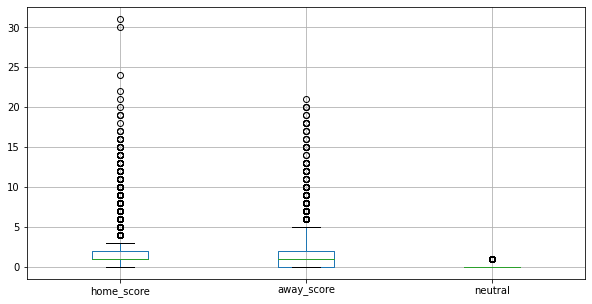

In [23]:
# Checking for Outliers
results_1 = results
plt.figure(figsize = (10, 5))
results_1.boxplot()
plt.show()


In the Results dataset, 'home_score' and 'away_score' variables have a lot of outliers. However, we cannot remove them because they real actual results and therefore provide useful insights.

In [24]:
# Identifying the Missing Data
results_1.isna().sum()


date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [25]:
results_1.isna().any()

date          False
home_team     False
away_team     False
home_score    False
away_score    False
tournament    False
city          False
country       False
neutral       False
dtype: bool

There is no missing data in the Results dataset

In [26]:
#checking for duplicates in Results dataset
results_1.duplicated().sum()

0

In [27]:
results_1.duplicated().any()

False

There are no duplicates in the Results dataset

In [29]:
#Converting the date column to type datetime

import datetime
results_1['date'] = pd.to_datetime(results_1['date'])
#
# splitting the datetime column into month and year
results_1['Year'], results_1['Month'] = results_1['date'].dt.year, results_1['date'].dt.month


In [30]:
results_1.head(3)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Year,Month
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,3
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,3


The date has been converted into an appropriate data type and format for further analysis

In [31]:
#Dropping unused columns
results_1.drop(['date','city','neutral'], axis=1, inplace=True)
results_1.head(3)


,home_team,away_team,home_score,away_score,tournament,country,Year,Month
0,Scotland,England,0,0,Friendly,Scotland,1872,11
1,England,Scotland,4,2,Friendly,England,1873,3
2,Scotland,England,2,1,Friendly,Scotland,1874,3


In the Results Dataset the columns date, city and neutral were drop as they are not useful in our analysis.

In [33]:
#Standardizing the table column names
results_1.columns = results_1.columns.str.strip().str.upper().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
results_1.columns
results_1.head(3)


,HOME_TEAM,AWAY_TEAM,HOME_SCORE,AWAY_SCORE,TOURNAMENT,COUNTRY,YEAR,MONTH
0,Scotland,England,0,0,Friendly,Scotland,1872,11
1,England,Scotland,4,2,Friendly,England,1873,3
2,Scotland,England,2,1,Friendly,Scotland,1874,3


The column names inthe Results dataset were standardised to capital letters

### a.Validation for Ranking Dataset

In [34]:
ranking.rank_date.unique

<bound method Series.unique of 0        1993-08-08
1        1993-08-08
2        1993-08-08
3        1993-08-08
4        1993-08-08
            ...    
57788    2018-06-07
57789    2018-06-07
57790    2018-06-07
57791    2018-06-07
57792    2018-06-07
Name: rank_date, Length: 57793, dtype: object>

The rank_date in the Ranking dataset is as per the international standard

### b.Tidying the Ranking Dataset

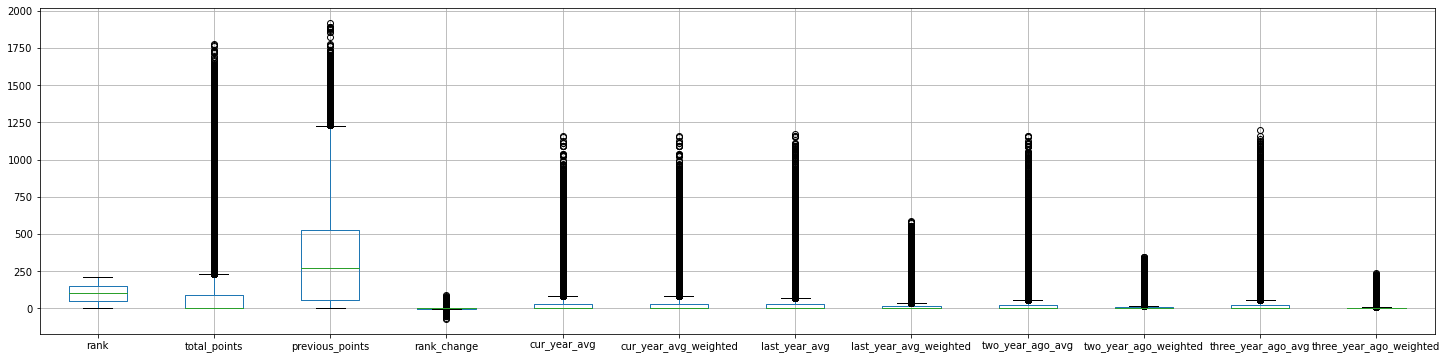

In [42]:
# Checking for Outliers

ranking1 = ranking
plt.figure(figsize = (25, 6))
ranking1.boxplot()
plt.show()


In [43]:
#Summary of the Ranking Dataset
ranking1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [44]:
# Identifying the Missing Data
ranking1.isna().sum()


rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [45]:
ranking1.isna().any()

rank                       False
country_full               False
country_abrv               False
total_points               False
previous_points            False
rank_change                False
cur_year_avg               False
cur_year_avg_weighted      False
last_year_avg              False
last_year_avg_weighted     False
two_year_ago_avg           False
two_year_ago_weighted      False
three_year_ago_avg         False
three_year_ago_weighted    False
confederation              False
rank_date                  False
dtype: bool

In the Ranking dataset there are no missing values.


In [47]:
#Checking for Duplicates 
ranking1.duplicated().any()

True

In [48]:
ranking1.duplicated().sum()

37

There are 37 duplicated records in the Ranking dataset

In [49]:
#Dropping the duplicated records in the ranking dataset

ranking1.drop_duplicates(keep='first', inplace = True)

In [50]:
ranking1.duplicated().sum()

0

The duplicated records were dropped and confirmed to have been dropped from the dataset

In [52]:
#Converting the rand_date column to type datetime

import datetime
ranking1['rank_date'] = pd.to_datetime(ranking1['rank_date'])
#
# splitting the datetime column into month and year
ranking1['Year'], ranking1['Month'] = ranking1['rank_date'].dt.year, ranking1['rank_date'].dt.month

In [53]:
ranking1.head(3)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,Year,Month
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8


In [54]:
# Dropping unnecessary columns
ranking1.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date', 'Year',
       'Month'],
      dtype='object')

In [55]:
ranking1.drop(['country_abrv','total_points', 'previous_points','cur_year_avg','cur_year_avg_weighted',
           'last_year_avg','last_year_avg_weighted','two_year_ago_avg','two_year_ago_weighted',
           'three_year_ago_avg','three_year_ago_weighted','confederation', 'rank_date', 
            'rank_change'], axis = 1, inplace = True)



In [56]:
ranking1.head(3)

,rank,country_full,Year,Month
0,1,Germany,1993,8
1,2,Italy,1993,8
2,3,Switzerland,1993,8


In the Ranking Dataset there were 12 columns were dropped as they are not useful in our analysis.

In [57]:
#Standardizing the table column names
ranking1.columns = ranking1.columns.str.strip().str.upper().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
ranking1.columns

ranking1.head(3)

,RANK,COUNTRY_FULL,YEAR,MONTH
0,1,Germany,1993,8
1,2,Italy,1993,8
2,3,Switzerland,1993,8


## MERGING THE DATASETS RESULTS AND RANKING

In [61]:
#Merging the data sets on home_team
home_team = pd.merge(ranking1, results_1, how='inner', left_on=['COUNTRY_FULL','YEAR','MONTH'], right_on = ['HOME_TEAM','YEAR', 'MONTH'] )
home_team.head()


,RANK,COUNTRY_FULL,YEAR,MONTH,HOME_TEAM,AWAY_TEAM,HOME_SCORE,AWAY_SCORE,TOURNAMENT,COUNTRY
0,4,Sweden,1993,8,Sweden,Switzerland,1,2,Friendly,Sweden
1,4,Sweden,1993,8,Sweden,France,1,1,FIFA World Cup qualification,Sweden
2,5,Argentina,1993,8,Argentina,Peru,2,1,FIFA World Cup qualification,Argentina
3,5,Argentina,1993,8,Argentina,Paraguay,0,0,FIFA World Cup qualification,Argentina
4,8,Brazil,1993,8,Brazil,Mexico,1,1,Friendly,Brazil


In [62]:
home_team.shape

(18593, 10)

In [66]:
#The rank is renamed to home_rank_team
home_team.rename({'RANK': 'HOME_TEAM_RANK'}, axis = 1, inplace  = True)



In [68]:
home_team.head()

,HOME_TEAM_RANK,COUNTRY_FULL,YEAR,MONTH,HOME_TEAM,AWAY_TEAM,HOME_SCORE,AWAY_SCORE,TOURNAMENT,COUNTRY
0,4,Sweden,1993,8,Sweden,Switzerland,1,2,Friendly,Sweden
1,4,Sweden,1993,8,Sweden,France,1,1,FIFA World Cup qualification,Sweden
2,5,Argentina,1993,8,Argentina,Peru,2,1,FIFA World Cup qualification,Argentina
3,5,Argentina,1993,8,Argentina,Paraguay,0,0,FIFA World Cup qualification,Argentina
4,8,Brazil,1993,8,Brazil,Mexico,1,1,Friendly,Brazil


Merged dataset on home_team column generates a new table called home_team 

In [69]:
#Merging the datasets on away_team

away_team= pd.merge(ranking1, results_1, how='inner', left_on=['COUNTRY_FULL','YEAR','MONTH'], right_on = ['AWAY_TEAM','YEAR', 'MONTH'] )
away_team.head()


,RANK,COUNTRY_FULL,YEAR,MONTH,HOME_TEAM,AWAY_TEAM,HOME_SCORE,AWAY_SCORE,TOURNAMENT,COUNTRY
0,3,Switzerland,1993,8,Sweden,Switzerland,1,2,Friendly,Sweden
1,5,Argentina,1993,8,Peru,Argentina,0,1,FIFA World Cup qualification,Peru
2,5,Argentina,1993,8,Paraguay,Argentina,1,3,FIFA World Cup qualification,Paraguay
3,5,Argentina,1993,8,Colombia,Argentina,2,1,FIFA World Cup qualification,Colombia
4,8,Brazil,1993,8,Venezuela,Brazil,1,5,FIFA World Cup qualification,Venezuela


In [70]:
#The rank is renamed to away_rank_team
away_team.rename({'RANK': 'AWAY_TEAM_RANK'}, axis = 1, inplace  = True)

In [71]:
away_team.head(3)

,AWAY_TEAM_RANK,COUNTRY_FULL,YEAR,MONTH,HOME_TEAM,AWAY_TEAM,HOME_SCORE,AWAY_SCORE,TOURNAMENT,COUNTRY
0,3,Switzerland,1993,8,Sweden,Switzerland,1,2,Friendly,Sweden
1,5,Argentina,1993,8,Peru,Argentina,0,1,FIFA World Cup qualification,Peru
2,5,Argentina,1993,8,Paraguay,Argentina,1,3,FIFA World Cup qualification,Paraguay


## Creating the final dataset

In [78]:
away_team1 =away_team[['AWAY_TEAM','AWAY_TEAM_RANK','YEAR','MONTH']]
away_team1.head()


,AWAY_TEAM,AWAY_TEAM_RANK,YEAR,MONTH
0,Switzerland,3,1993,8
1,Argentina,5,1993,8
2,Argentina,5,1993,8
3,Argentina,5,1993,8
4,Brazil,8,1993,8


In [79]:
home_team1 = home_team

final_data = pd.merge(home_team1, away_team1, how = 'inner', left_on = ['YEAR', 'MONTH', 'AWAY_TEAM'],
                      right_on = ['YEAR', 'MONTH', 'AWAY_TEAM'])

In [80]:
final_data.head(3)

,HOME_TEAM_RANK,COUNTRY_FULL,YEAR,MONTH,HOME_TEAM,AWAY_TEAM,HOME_SCORE,AWAY_SCORE,TOURNAMENT,COUNTRY,AWAY_TEAM_RANK
0,4,Sweden,1993,8,Sweden,Switzerland,1,2,Friendly,Sweden,3
1,4,Sweden,1993,8,Sweden,France,1,1,FIFA World Cup qualification,Sweden,12
2,5,Argentina,1993,8,Argentina,Peru,2,1,FIFA World Cup qualification,Argentina,70


In [81]:
final_data.shape

(28439, 11)

The final dataset has 28439 rows and 11 columns

Function for generating a win, loss or draw for the final dataset

In [83]:
#creating a function 
#
def get_status(row):
  if (row["HOME_SCORE"] > row["AWAY_SCORE"]):
    return "WIN"
  elif (row["HOME_SCORE"] == row["AWAY_SCORE"]):
    return "DRAW"
  else :
    return "LOSS"


In [85]:
final_data["STATUS"] =final_data.apply(lambda x:get_status(x), axis=1)


In [86]:
final_data.head(3)

,HOME_TEAM_RANK,COUNTRY_FULL,YEAR,MONTH,HOME_TEAM,AWAY_TEAM,HOME_SCORE,AWAY_SCORE,TOURNAMENT,COUNTRY,AWAY_TEAM_RANK,status,STATUS
0,4,Sweden,1993,8,Sweden,Switzerland,1,2,Friendly,Sweden,3,LOSS,LOSS
1,4,Sweden,1993,8,Sweden,France,1,1,FIFA World Cup qualification,Sweden,12,DRAW,DRAW
2,5,Argentina,1993,8,Argentina,Peru,2,1,FIFA World Cup qualification,Argentina,70,WIN,WIN


In [ ]:
#Generate a function for tournament type
#
def get_tournament(x):
  if x == 'FIFA World Cup qualification':
    return 'FIFA World Cup'
  if x == 'Friendly':
    return 'Friendly'
  else:
    return 'Other'


In [87]:
# Applying the result function to the dataframe
#
final_data['TOURNAMENT_TYPE'] = final_data.tournament.apply(lambda x:get_tournament(x))
final_data.head()


AttributeError: ignored